In [2]:
import pandas as pd
data = pd.read_csv('HistoricalPrices.csv')
data.head()

,Date,Open,High,Low,Close
0,09/05/23,34843.22,34871.26,34635.63,34641.97
1,09/01/23,34876.24,34979.18,34720.70,34837.71
2,08/31/23,34909.09,35070.21,34719.77,34721.91
3,08/30/23,34847.80,35025.57,34811.74,34890.24
4,08/29/23,34531.12,34864.42,34531.12,34852.67


In [4]:
# As a quick clean up step, we will also need to use the rename() method in pandas as the dataset we downloaded has an extra space in the column names.
data = data.rename(columns = {' Open': 'Open', ' High': 'High', ' Low': 'Low', ' Close': 'Close'})
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values(by = 'Date')

/tmp/ipykernel_5987/3590417438.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])


In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime

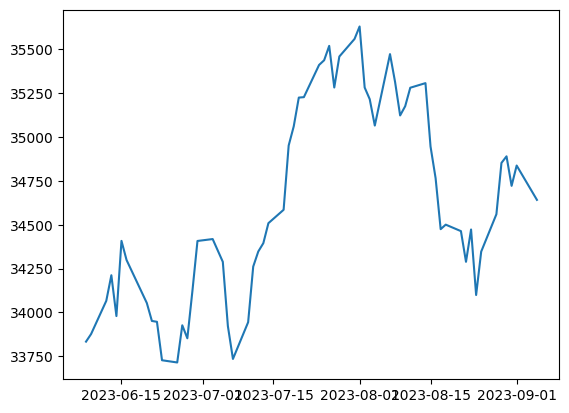

In [7]:
# Line Plots with a Single Line
plt.plot(data['Date'],data['Close'])
plt.show()

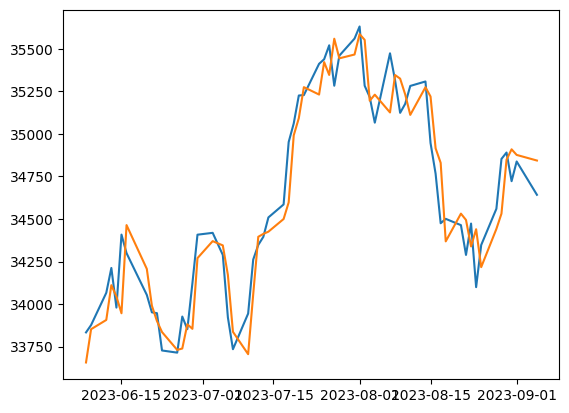

In [9]:
# Line Plots with Multiple Lines
plt.plot(data['Date'],data['Close'])
plt.plot(data['Date'],data['Open'])
plt.show()

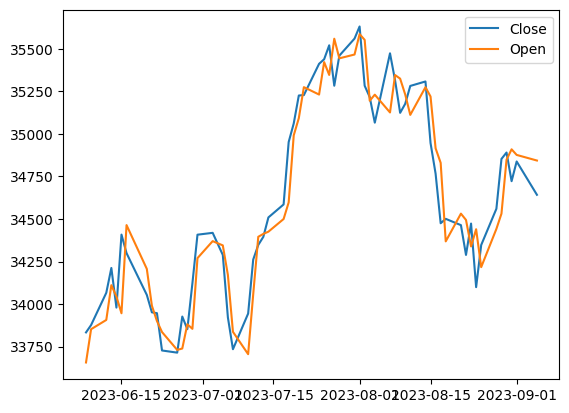

In [13]:
# Adding a Legend
plt.plot(data['Date'],data['Close'],label='Close')
plt.plot(data['Date'],data['Open'] ,label='Open')
plt.legend()
plt.show()

In [21]:
# Drawing Bar Plots
# Import the calendar package 
from calendar import month_name

# Order by months by chronological order
data['Month'] = pd.Categorical(data['Date'].dt.month_name(), month_name[1:])

# Group metrics by monthly averages
monthly_mean = data \
    .groupby('Month') \
    .mean() \
    .reset_index()

monthly_mean.head(12)

,Month,Date,Open,High,Low,Close
0,January,NaT,NaN,NaN,NaN,NaN
1,February,NaT,NaN,NaN,NaN,NaN
2,March,NaT,NaN,NaN,NaN,NaN
3,April,NaT,NaN,NaN,NaN,NaN
4,May,NaT,NaN,NaN,NaN,NaN
5,June,2023-06-19 13:30:00,33961.940000,34120.254375,33868.00125,34023.688125
6,July,2023-07-16 20:24:00,34731.967500,34898.006000,34646.13550,34777.200000
7,August,2023-08-16 00:00:00,34915.545652,35076.850870,34750.49913,34880.656957
8,September,2023-09-03 00:00:00,34859.730000,34925.220000,34678.16500,34739.840000
9,October,NaT,NaN,NaN,NaN,NaN


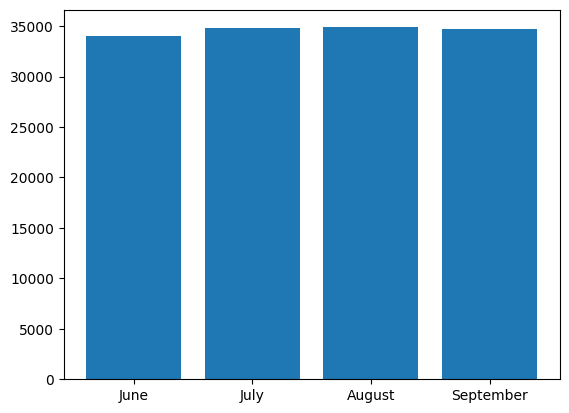

In [22]:
# Vertical Bar Plots
plt.bar(monthly_mean['Month'], height = monthly_mean['Close'])
plt.show()

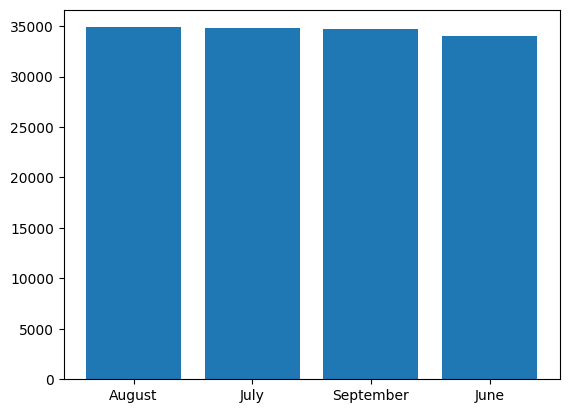

In [24]:
# Reordering Bars in Bar Plots
monthly_mean_srtd = monthly_mean.sort_values(by = 'Close', ascending = False)

plt.bar(monthly_mean_srtd['Month'], height = monthly_mean_srtd['Close'])
plt.show()

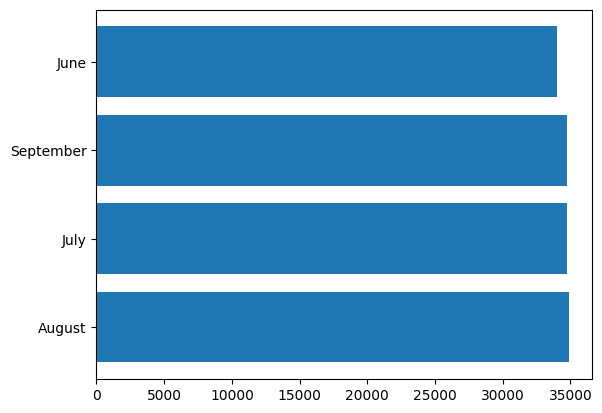

In [26]:
# Horizontal Bar Plots
plt.barh(monthly_mean_srtd['Month'], width = monthly_mean_srtd['Close'])
plt.show()

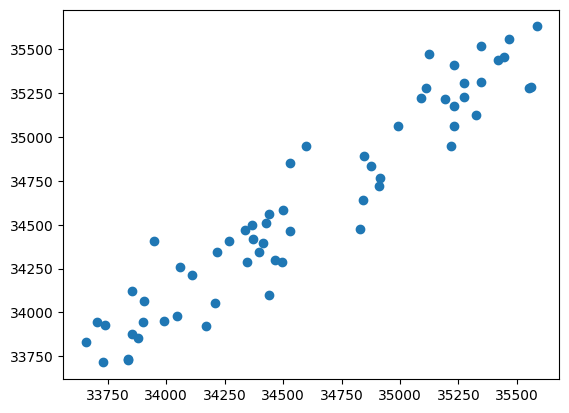

In [27]:
# Drawing Scatter Plots
plt.scatter(data['Open'], data['Close'])
plt.show()

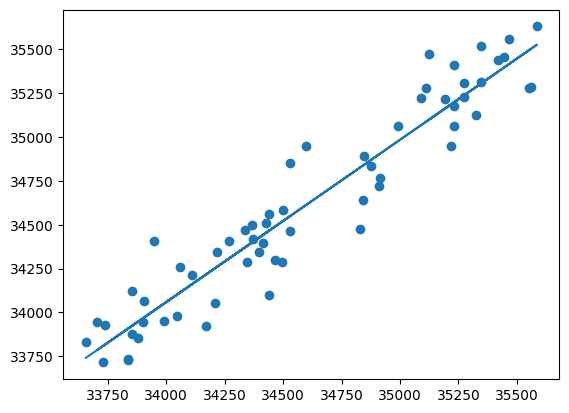

In [28]:
z = np.polyfit(data['Open'],data['Close'], 1)
p = np.poly1d(z)


plt.scatter(data['Open'], data['Close'])
plt.plot(data['Open'], p(data['Open']))
plt.show()

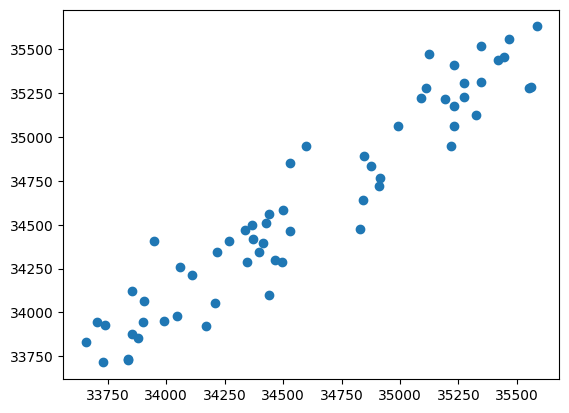

In [33]:
# Setting the Plot Title and Axis Labels
plt.scatter(data['Open'], data['Close'])
plt.show()

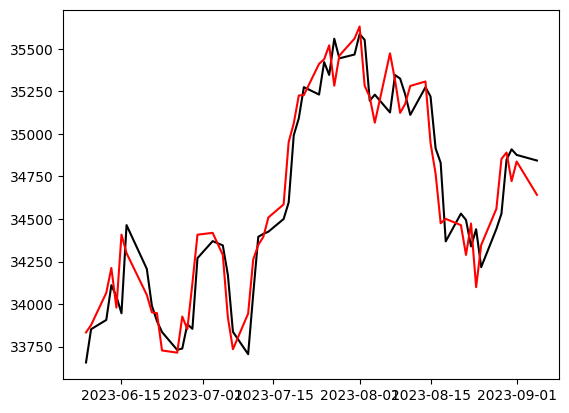

In [34]:
# Changing Colors
plt.plot(data['Date'], data['Open'], color = 'black')
plt.plot(data['Date'], data['Close'], color = 'red')
plt.show()

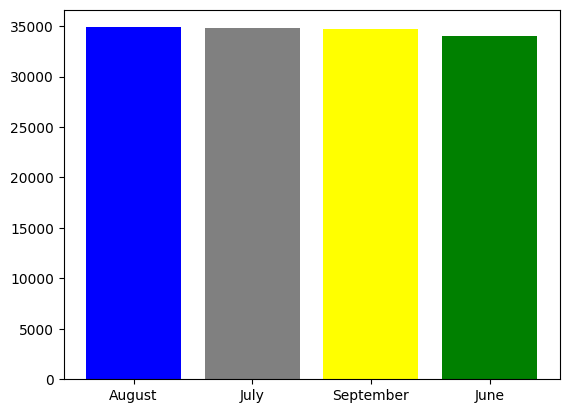

In [36]:
plt.bar(monthly_mean_srtd['Month'], height = monthly_mean_srtd['Close'], color = ['blue', 'gray', 'yellow', 'green', 'red', 'pink'])
plt.show()

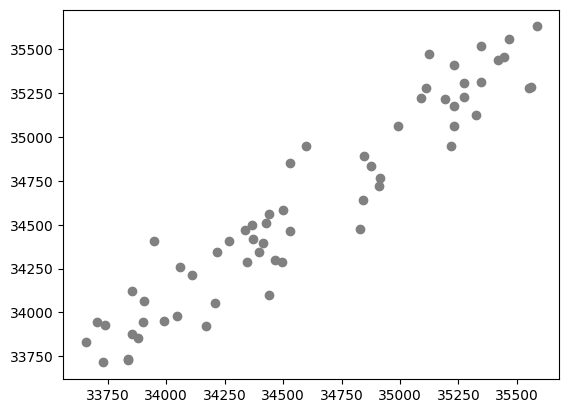

In [38]:
plt.scatter(data[data['Month'] == 'January']['Open'], data[data['Month'] == 'January']['Close'], color = 'blue')

plt.scatter(data[data['Month'] != 'January']['Open'], data[data['Month'] != 'January']['Close'], color = 'gray')

plt.show()

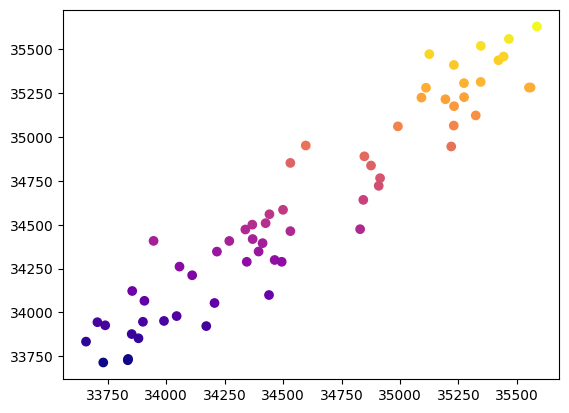

In [39]:
plt.scatter(data['Open'], data['Close'], c=data['Close'], cmap = plt.cm.plasma)

plt.show()

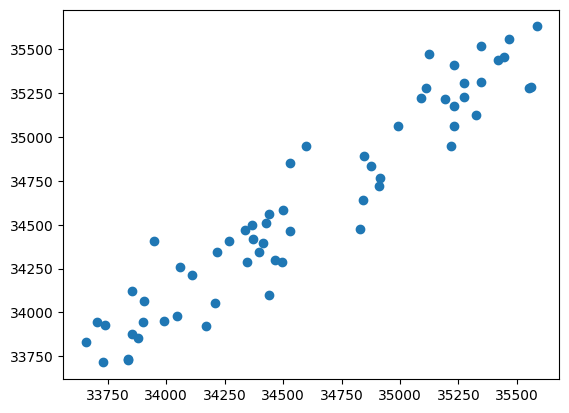

In [41]:
# Saving Plots
plt.scatter(data['Open'], data['Close'])
plt.savefig('DJIA 2022 Scatterplot Open vs. Close.png')